In [1]:
# millions of words addressed to child 
def input_voc(month):
    '''finds the number of words a typical middle class child hears at a given age (in months)'''
    return 0.625*month*1000000

In [1]:
import pandas as pd

In [4]:
import re
def remove_p(x):
    return re.sub(r'（[^)]*）', '', x)
def clean_punct(x):
    punc = " \(\)!！？｡。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏."
    return re.sub(r"[%s]+" %punc, "", x)

In [5]:
word_data = pd.read_csv("item_data.csv")
word_data["definition"] = word_data["definition"].apply(lambda x: remove_p(x))
word_data["definition"] = word_data["definition"].str.split("/")
word_data = word_data.explode("definition")
word_data["definition"] = word_data["definition"].apply(lambda x: clean_punct(x))

word_data["definition"].to_list()

['au',
 'bææ',
 'brrrbil-lyd',
 'gakkgakk',
 'grr',
 'kykeliky',
 'mjau',
 'møø',
 'nam-nam',
 'oiuttrykkforoverraskelse',
 'tøff-tøff',
 'voffvoff',
 'meitemark',
 'and',
 'apekatt',
 'bjørn',
 'dyr',
 'ekorn',
 'elefant',
 'elg',
 'esel',
 'fiskanimal',
 'flue',
 'frosk',
 'fugl',
 'gås',
 'gris',
 'hane',
 'hest',
 'høne',
 'hund',
 'kanin',
 'katt',
 'kattunge',
 'krokodille',
 'ku',
 'kyllinganimal',
 'lam',
 'lekebamse',
 'løve',
 'maur',
 'mus',
 'mygg',
 'pingvin',
 'ponni',
 'reinsdyr',
 'sau',
 'sebra',
 'sjiraff',
 'skilpadde',
 'sommerfugl',
 'tiger',
 'ugle',
 'ulv',
 'valp',
 'veps',
 'akebrett',
 'barnevogn',
 'bil',
 'brannbil',
 'båt',
 'buss',
 'fly',
 'helikopter',
 'lastebil',
 'motorsykkel',
 'sykkel',
 'tog',
 'traktor',
 'trehjulssykkel',
 'ball',
 'ballong',
 'blyant',
 'bok',
 'klosser',
 'dukke',
 'lego',
 'eventyr',
 'fargeblyant',
 'presang',
 'kritt',
 'lekeobject',
 'lim',
 'penn',
 'plastilina',
 'puslespill',
 'spill',
 'såpebobler',
 'brødskive',
 'agur

<AxesSubplot:ylabel='Frequency'>

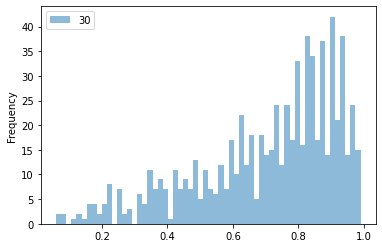

In [6]:
import statistics
l = len(word_data)+1
word_data[["30"]].plot.hist(bins=60, alpha=0.5)

In [7]:
len(word_data[word_data["30"]>0.5])
## approximate number of words a kid should know

594

In [8]:
# find unique words in the CHILDES
# with open("corpora/000_bi.txt") as file:
#     bi = file.read().split("\n")
#     bi_text = []
#     for sentence in bi:
#         words = sentence.split(" ")
#         if words:
#             bi_text+=words
    
with open("corpora/dev_000.txt") as file:
    dev = file.read().split("\n")
    dev_text = []
    for sentence in dev:
        words = sentence.split(" ")
        if words:
            dev_text+=words

In [9]:
corpus_size = len(dev_text)
corpus_size

138145

In [10]:
import nltk
from nltk.probability import FreqDist

# bi_freq = nltk.FreqDist(bi_text)
dev_freq = nltk.FreqDist(dev_text)
dev_freq.pop("",None)

# bi_freq.pop("",None)
# bi_freq.plot(25, cumulative=False)

2362

<AxesSubplot:ylabel='Frequency'>

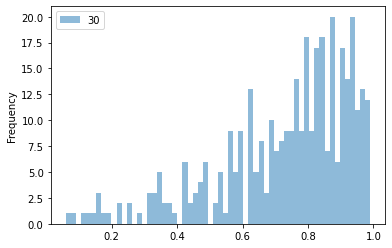

In [11]:
selected_words = []     # words selected from CDI
for word in word_data["definition"]:
    if word in dev_freq:
        selected_words.append(word)

seletced_word_data = word_data[word_data["definition"].isin(selected_words)]
l = len(seletced_word_data)+1
seletced_word_data[["30"]].plot.hist(bins=60, alpha=0.5)

In [12]:
len(seletced_word_data[seletced_word_data["30"]>0.8])
## approximate number of words a kid should know

164

In [13]:
len(word_data)

733

In [14]:
len(selected_words)

360

In [28]:
selected_words_freq = {k: v/corpus_size for k, v in dev_freq.items() if k in selected_words}
selected_words_freq

{'小': 0.006491783895221926,
 '熊': 0.00046992481203007516,
 '上': 0.003065880426873636,
 '穿': 0.0014438818821246664,
 '的': 0.018209586466165415,
 '什么': 0.020729747756487994,
 '东西': 0.0031227261702643705,
 '呀': 0.005896798447732234,
 '你': 0.040315001212709194,
 '看': 0.011092499393645403,
 '是': 0.022749666504972108,
 '毛衣': 5.305602716468591e-05,
 '到': 0.005548144554935726,
 '妈妈': 0.007772707979626485,
 '这儿': 0.00026149041959738057,
 '来': 0.010114752607324763,
 '给': 0.0072118299781712344,
 '坐': 0.0025050024254183846,
 '说': 0.0053548690274072275,
 '呢': 0.0045552389037108905,
 '朋友': 0.0002235932573368906,
 '有': 0.009239328159107446,
 '个': 0.0206994300266796,
 '喜欢': 0.001148284016492845,
 '一样': 0.0007806815425660926,
 '吗': 0.0031454644676206646,
 '啊': 0.031121149648314334,
 '一': 0.011194821731748726,
 '红': 0.0006366723259762309,
 '找': 0.001064910259519767,
 '怎么': 0.005551934271161775,
 '黄': 0.0001705372301722047,
 '噢': 0.0012847138006306087,
 '绿': 0.00019706524375454767,
 '白': 0.00044339679844

In [29]:
import math
selected_words_occ_24 = {k:math.ceil(v*input_voc(24)) for k,v in selected_words_freq.items()}
selected_words_occ_24

{'小': 97377,
 '熊': 7049,
 '上': 45989,
 '穿': 21659,
 '的': 273144,
 '什么': 310947,
 '东西': 46841,
 '呀': 88452,
 '你': 604726,
 '看': 166388,
 '是': 341245,
 '毛衣': 796,
 '到': 83223,
 '妈妈': 116591,
 '这儿': 3923,
 '来': 151722,
 '给': 108178,
 '坐': 37576,
 '说': 80324,
 '呢': 68329,
 '朋友': 3354,
 '有': 138590,
 '个': 310492,
 '喜欢': 17225,
 '一样': 11711,
 '吗': 47182,
 '啊': 466818,
 '一': 167923,
 '红': 9551,
 '找': 15974,
 '怎么': 83280,
 '黄': 2559,
 '噢': 19271,
 '绿': 2956,
 '白': 6651,
 '啦': 74071,
 '开': 33085,
 '能': 29788,
 '跑': 14894,
 '我': 155587,
 '数数': 739,
 '拿': 86179,
 '辆': 853,
 '我们': 55084,
 '换': 7561,
 '好': 257398,
 '搭': 10119,
 '了': 316574,
 '蓝': 1649,
 '排': 1876,
 '把': 62588,
 '放': 62247,
 '去': 113692,
 '现在': 13643,
 '用': 27912,
 '哎哟': 27059,
 '拔': 4434,
 '可以': 27798,
 '下': 20692,
 '插': 9039,
 '玩': 42407,
 '自己': 23023,
 '捡': 10574,
 '在': 178894,
 '要': 230965,
 '长': 13359,
 '打': 24785,
 '人': 19499,
 '向': 683,
 '谁': 65373,
 '孙悟空': 512,
 '为什么': 19726,
 '告诉': 9380,
 '会': 90101,
 '阿姨': 86690,
 '举': 512

In [30]:
prob_24 = dict(zip(word_data["definition"].to_list(), word_data["24"].to_list()))
selected_prob_24 = {k:v for k,v in prob_24.items() if k in selected_words}
selected_prob_24

{'喂': 0.89,
 '旺旺': 0.96,
 '喵': 0.91,
 '哎哟': 0.89,
 '呀': 0.79,
 '咩咩': 0.79,
 '嗷': 0.86,
 '妈妈': 1.0,
 '爸爸': 1.0,
 '奶奶': 0.97,
 '爷爷': 0.97,
 '宝宝': 0.87,
 '阿姨': 0.93,
 '姑姑': 0.89,
 '叔叔': 0.89,
 '伯伯': 0.89,
 '舅舅': 0.84,
 '姐姐': 0.91,
 '妹妹': 0.89,
 '哥哥': 0.89,
 '弟弟': 0.87,
 '人': 0.69,
 '孩子': 0.77,
 '小孩': 0.77,
 '小朋友': 0.77,
 '女孩': 0.61,
 '男人': 0.2,
 '老师': 0.57,
 '警察': 0.73,
 '医生': 0.6,
 '唐老鸭': 0.6,
 '米老鼠': 0.64,
 '孙悟空': 0.71,
 '猪八戒': 0.71,
 '朋友': 0.51,
 '要': 0.94,
 '再见': 0.96,
 'Byebye': 0.96,
 '谢谢': 0.93,
 '撒尿': 0.89,
 '尿尿': 0.89,
 '吃饭': 0.89,
 '洗澡': 0.83,
 '休息': 0.66,
 '歇会儿': 0.66,
 '打': 0.96,
 '你好': 0.79,
 '好': 0.93,
 '请': 0.54,
 '好吧': 0.83,
 '是': 0.81,
 '对了': 0.7,
 '快点': 0.79,
 '等等': 0.71,
 '轻点': 0.56,
 '听话': 0.8,
 '上学': 0.69,
 '抱': 0.97,
 '拿': 0.93,
 '来': 0.87,
 '走': 0.93,
 '坐': 0.9,
 '站': 0.81,
 '蹲': 0.79,
 '尿': 0.9,
 '上': 0.79,
 '下': 0.83,
 '喝': 0.91,
 '吃': 0.93,
 '爬': 0.89,
 '有': 0.89,
 '睡觉': 0.86,
 '玩': 0.91,
 '开': 0.9,
 '关': 0.89,
 '画画': 0.86,
 '背': 0.93,
 '戴': 0.87,
 '洗': 0.9,
 '擦'

In [31]:
import random as rand

def find_lr(occ, prob):
    prob = round(prob, 2)
    attempt = rand.random()
    right_bound = 1
    left_bound = 0
    while True:
        attempt_ans = 1-binom.cdf(0, occ, attempt)
        attempt_ans = round(attempt_ans,2)
#         print("%f, %f, %f"%(attempt, attempt_ans, prob))

        if attempt_ans == prob:
            return attempt
            
        elif attempt_ans < prob:
            temp = attempt
            attempt = (right_bound - attempt)/2 + attempt
            left_bound = temp
            
        else:
            temp = attempt
            attempt = attempt/2
            right_bound = temp
            

In [32]:
from scipy.stats import binom

selected_word_lr = {}
for word in selected_words:
    occ = selected_words_occ_24[word]
    prob = selected_prob_24[word]
    lr = find_lr(occ, prob)
    selected_word_lr[word] = lr

In [33]:
## check if the leanring rate was correct
def _unittest(occ, prob, lr):
    predicted_prob = 1-binom.cdf(0, occ, lr)
    print(predicted_prob)
    print(prob)
# _unittest(selected_words_occ_24["egg"],selected_prob_24["egg"], selected_word_lr["egg"])

In [34]:
selected_word_lr

{'喂': 0.00038528562906806947,
 '旺旺': 0.027269483057117336,
 '喵': 0.002000616239023517,
 '哎哟': 8.165974187068271e-05,
 '呀': 1.7798166283673484e-05,
 '咩咩': 0.006855024816166946,
 '嗷': 0.01127290474375268,
 '妈妈': 0.591810399193363,
 '爸爸': 0.3826884084545874,
 '奶奶': 0.00031206064472574324,
 '爷爷': 0.0013742401761004715,
 '宝宝': 0.00021264200868022237,
 '阿姨': 3.074059539795824e-05,
 '姑姑': 0.0024045892210089004,
 '叔叔': 0.0006135299083024213,
 '伯伯': 0.001963103966595464,
 '舅舅': 0.00043580259807361234,
 '姐姐': 0.000165742365700528,
 '妹妹': 0.00015779056774894396,
 '哥哥': 0.000287293110324553,
 '弟弟': 0.00036667013874858644,
 '人': 6.0368562334963596e-05,
 '孩子': 0.0012181038653004143,
 '小孩': 0.001508347599304251,
 '小朋友': 0.0003199938909016501,
 '女孩': 0.004150277607040833,
 '男人': 0.0019994085967375867,
 '老师': 0.00025135387637157747,
 '警察': 0.001154118288165094,
 '医生': 0.0003820041564448467,
 '唐老鸭': 0.001157404618062592,
 '米老鼠': 0.0008573098462928294,
 '孙悟空': 0.002423429708909448,
 '猪八戒': 0.002431865139

In [35]:
import json
with open("lr/dev_24.json","w") as file:
    json.dump(selected_word_lr,file, indent=4)

In [36]:
## write them into one function

freq_dict = [dev_freq]
months = [16,23,30]

for corpus in freq_dict:
    for month in months:
        if corpus == dev_freq:
            corpus_name = "dev"
        else:
            corpus_name = "bi"

        month_key = str(month)

        selected_words = []     # words selected from CDI
        for word in word_data["definition"]:
            if word in corpus:
                selected_words.append(word)

        selected_words_freq = {k: v/corpus_size for k, v in corpus.items() if k in selected_words}
        input_v = input_voc(month)
        selected_words_occ = {k:math.ceil(v*input_v) for k,v in selected_words_freq.items()}
        prob = dict(zip(word_data["definition"].to_list(), word_data[month_key].to_list()))
        selected_prob = {k:v for k,v in prob.items() if k in selected_words}

        selected_word_lr = {}

        for word in selected_words:
            occ = selected_words_occ[word]
            prob = selected_prob[word]
            lr = find_lr(occ, prob)
            selected_word_lr[word] = lr

        output_file_name = "lr/" + corpus_name + "_" + month_key + ".json"

        with open(output_file_name,"w") as file:
            json.dump(selected_word_lr,file, indent=4)


In [37]:
factor = corpus_size/len(dev)
factor


3.7862052142969884

In [140]:
input_voc(30)

18750000.0